In [ ]:
import tensorflow as tf

def RPCA_thr_p(input_, a, b, c, d):
  # return soft_thr(input_,theta_)(gamma/(gamma-1)) - soft_thr(input_,T)(1/(gamma-1))
  return -tf.nn.relu(-input_-a)+tf.nn.relu(input_-d)+tf.nn.relu(input_+b)-tf.nn.relu(input_-c)

def RPCA_thr_n(input_, a, b, c, d):
  return tf.nn.relu(input_-a)-tf.nn.relu(-input_-d)-tf.nn.relu(-input_+b)+tf.nn.relu(-input_-c)



def soft_thr(input_, theta_):
    return tf.nn.relu(input_-theta_)-tf.nn.relu(-input_-theta_)

def firm_thr(input_, theta_, gamma):
  T = theta_*gamma
  # return soft_thr(input_,theta_)(gamma/(gamma-1)) - soft_thr(input_,T)(1/(gamma-1))
  return (1/(gamma-1))*tf.nn.relu(-input_-T)-(gamma/(gamma-1))*tf.nn.relu(-input_-theta_)+(gamma/(gamma-1))*tf.nn.relu(input_-theta_)-(1/(gamma-1))*tf.nn.relu(input_-T)

# def scad(input_, theta_, gamma):


In [ ]:
import numpy as np
x = tf.linspace(-1000,1001,2001)
print(x.shape)
y = np.array([x,x,x,x,x,x,x,x,x,x]).T
print(y.shape)
# f = soft_thr(x,250)
# firm = firm_thr(x,250,2)
RPCA_p = RPCA_thr_p(y,500,300,100,500)
RPCA_n = RPCA_thr_n(y,500,300,100,500)
print(RPCA_p)
print(RPCA_n)

(2001,)
(2001, 10)
tf.Tensor(
[[-500.     -500.     -500.     ... -500.     -500.     -500.    ]
 [-498.9995 -498.9995 -498.9995 ... -498.9995 -498.9995 -498.9995]
 [-497.999  -497.999  -497.999  ... -497.999  -497.999  -497.999 ]
 ...
 [ 898.999   898.999   898.999  ...  898.999   898.999   898.999 ]
 [ 899.9995  899.9995  899.9995 ...  899.9995  899.9995  899.9995]
 [ 901.      901.      901.     ...  901.      901.      901.    ]], shape=(2001, 10), dtype=float64)
tf.Tensor(
[[-900.     -900.     -900.     ... -900.     -900.     -900.    ]
 [-898.9995 -898.9995 -898.9995 ... -898.9995 -898.9995 -898.9995]
 [-897.999  -897.999  -897.999  ... -897.999  -897.999  -897.999 ]
 ...
 [ 498.999   498.999   498.999  ...  498.999   498.999   498.999 ]
 [ 499.9995  499.9995  499.9995 ...  499.9995  499.9995  499.9995]
 [ 501.      501.      501.     ...  501.      501.      501.    ]], shape=(2001, 10), dtype=float64)


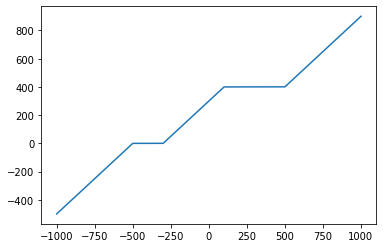

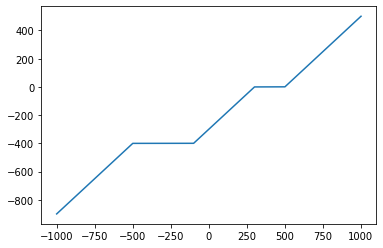

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(x,RPCA_p[:,9])
plt.figure()
plt.plot(x,RPCA_n[:,2])
plt.show()

In [ ]:
def refRPCA(M,P,Q,H1,H2,l1,l2,l3,c,d):
  for k in range(d):
    L_tilda_k = (tf.eye(n) - (1/c)*tf.transpose(H1)@H1)@L_k - tf.transpose(H1)@H2@S_k + tf.transpose(H1)@M
    S_tilda_k = (tf.eye(n) - (1/c)*tf.transpose(H2)@H2)@S_k - tf.transpose(H2)@H1@L_k + tf.transpose(H2)@M
    L_k_1 = soft_thr(L_tilda_k, l1/c)
    Sp = [s1_k, Ps1_k, .... , Psm_1_k]
    S_k_1 = RPCA_thr(S_tilda_k, l2/c, l3/c, q, Sp)
    L_k = L_k_1
    S_k = S_k_1
